# CONTEXT: PRODUCT INNOVATION CASE  
## BANKING INDUSTRY | ACCENBANK  
### Data & AI Analysts  

Camila informed Johanna that AccenBank has been compiling relevant information from the Customer Support team for some time. Currently, AccenBank has utilized the provided information to conduct quality control on the Bank’s Customer Support team. Nevertheless, they have plans to expand the scope of the data and use it in other processes such as creating new products, mapping potential customers, and retention plans. Camila believes that this data could be useful in addressing the challenge of choosing the best product and strategy.

In detail, AccenBank has **three datasets available**:

- The first dataset consists of PQRs, summarizing the attention provided by the Customer Service team to the end user.
- This dataset is complemented by two others containing information about the **business segment** and the **client's products**.
- Additionally, there is a **data dictionary** for better understanding.

Johanna asks the Accenture team, with an emphasis on data, to analyze the datasets provided by the bank along with the information.  

To deliver the results, please generate a presentation answering the questions and a Dashboard (in the tool of your choice) with the management indicators relevant to the business.  

For a successful analysis, Johanna provides the Accenture team with the following guiding questions:  

1. **What is the distribution of PQRs over time (date)?**  

2. **How are PQRs distributed in different typologies and what conclusions can be drawn from this?**  

3. **Does it make sense to analyze typologies? Why?**  

4. **What analysis do you propose for the development by typology that can extract the greatest possible value from the data?**  

5. **What are the most consulted products in the Bank's database?**  

6. **What is the distribution of PQRs by contact channel and what conclusions can be drawn from that?**  

7. **What would you propose to improve the user experience and the way the bank manages PQRs?**  

8. **Optional:** Use the "" column to extract the most frequent reasons for query in calls received in the Bank’s call center.

# 1. Importing Libraries

In [102]:
import pandas as pd #This library is used for data manipulation and analysis
import numpy as np #This library is used for working with arrays
import matplotlib.pyplot as plt #This library is used for visualization
import seaborn as sns #This library is used for data visualization

# 2. Importing Data

In [103]:
# Browsing the datasets it can be seen that the data in PQRs_consolidation and business_segment is separated by "|" instead of ",", changing the separator to "|" in the read_csv function
pqr_df = pd.read_csv('datasets/PQRs_consolidation.csv', sep='|')
business_segment_df = pd.read_csv('datasets/business_segment.csv', sep='|')
products_df = pd.read_csv('datasets/products.csv', sep=',')

## 2.1 Verifying the first rows of the datasets

In [104]:
pqr_df.head()

,Unnamed: 0,SOLICITUD,Nombre Tipologia,Tipologia,Descripcion Suborigen,Flujo,Fecha Radicacion Caso,Tipo ID Cliente,ID Cliente 2,CANAL1,CANAL2,Tipologia Squad,Atencion,"Inidicador fecha,,",DATE,Motivo,Motivo_Limpiado
0,0,10672651,Compra No Pertenece en TC,Servicio,FRAUDE,323,2023-06-07 10:40:34 10:40:34,C,10000264834,Call Center,Canales Banco,Tipologías de Servicio,Back Service,"4,,",2023-06-07,cliente reclama por compra correo: natha*...,cliente reclama por compra correo: natha*...
1,1,10605243,Aclaración Productos Servicio,Servicio,Aclaración deuda/ Disponible,8,2023-05-08 06:59:22 06:59:22,C,10000018169,Chat,Canales Banco,Tipologías de Servicio,Back Service,"4,,",2023-05-08,********-******** dando alcance al radicado *...,********-******** dando alcance al radicado *...
2,2,10491337,Cambio Tipo de Producto,Servicio,Unificación Cupos TC,212,2023-03-15 10:51:17 10:51:17,C,10000254379,Call Center,Canales Banco,Tipologías de Servicio,Back Service,"4,,",2023-03-15,gscl cliente cuenta con productos en mora(va...,gscl cliente cuenta con productos en mora(va...
3,3,10061330,Cobro Servicios Bancar Middle,Servicio,Comisión tranx cajero automati,1,2022-08-30 03:42:33 03:42:33,C,10000157427,Call Center,Canales Banco,Cobro de Servicios Bancarios,Back Service,"1,,",2022-08-30,NaN,NaN
4,4,10307260,Compra No Pertenece en TC,Servicio,FRAUDE,323,2022-12-15 10:53:14 10:53:14,C,10000248252,Call Center,Canales Banco,Tipologías de Servicio,Back Service,"3,,",2022-12-15,NaN,NaN


In [105]:
business_segment_df.head()

,ID Cliente 2,Segmento
0,10000264834,CLASICO
1,10000018169,PREMIUM
2,10000254379,CLASICO
3,10000157427,CLASICO
4,10000248252,CLASICO


In [106]:
products_df.head()

,Tipo Producto,Nombre Producto,Subproducto,Nombre Subproducto,ID Cliente 2
0,2,Tarjeta credito Master,44,MMBL,10000264834
1,12,Tarjeta Visa,21,VIS INTE AV,10000018169
2,2,Tarjeta credito Master,4,MOR,10000254379
3,1,Tarjeta Credito Visa,62,CENS G,10000157427
4,1,Tarjeta Credito Visa,62,CENS G,10000248252


# 3 Data Preparation

## 3.1 Deleting columns that are not relevant for the analysis

In [107]:
# Deleting the columns that are not relevant for the analysis
# Unnamed: 0: This column is not relevant for the analysis and it is a duplicate of the index
# Motivo: there is another column called Motivo_Limpiado that is already cleaned
# SOLICITUD: is the id of the request, it is not relevant for the analysis
# Fecha Radicacion Caso: the date is already in the DATE column
# Inidicador fecha,,: is related to the date, thus it is redundant

#Deleting Unnamed: 0, first column
pqr_df.drop(pqr_df.columns[0], axis=1, inplace=True)
pqr_df.drop(columns=['Motivo'], inplace=True)
pqr_df.drop(columns=['SOLICITUD'], inplace=True)
pqr_df.drop(columns=['Fecha Radicacion Caso'], inplace=True)
pqr_df.drop(columns=['Inidicador fecha,,'], inplace=True)
pqr_df.head()

,Nombre Tipologia,Tipologia,Descripcion Suborigen,Flujo,Tipo ID Cliente,ID Cliente 2,CANAL1,CANAL2,Tipologia Squad,Atencion,DATE,Motivo_Limpiado
0,Compra No Pertenece en TC,Servicio,FRAUDE,323,C,10000264834,Call Center,Canales Banco,Tipologías de Servicio,Back Service,2023-06-07,cliente reclama por compra correo: natha*...
1,Aclaración Productos Servicio,Servicio,Aclaración deuda/ Disponible,8,C,10000018169,Chat,Canales Banco,Tipologías de Servicio,Back Service,2023-05-08,********-******** dando alcance al radicado *...
2,Cambio Tipo de Producto,Servicio,Unificación Cupos TC,212,C,10000254379,Call Center,Canales Banco,Tipologías de Servicio,Back Service,2023-03-15,gscl cliente cuenta con productos en mora(va...
3,Cobro Servicios Bancar Middle,Servicio,Comisión tranx cajero automati,1,C,10000157427,Call Center,Canales Banco,Cobro de Servicios Bancarios,Back Service,2022-08-30,NaN
4,Compra No Pertenece en TC,Servicio,FRAUDE,323,C,10000248252,Call Center,Canales Banco,Tipologías de Servicio,Back Service,2022-12-15,NaN


## 3.2 Verifying the data types of the datasets

In [108]:
pqr_df.dtypes

Nombre Tipologia         object
Tipologia                object
Descripcion Suborigen    object
Flujo                     int64
Tipo ID Cliente          object
ID Cliente 2              int64
CANAL1                   object
CANAL2                   object
Tipologia Squad          object
Atencion                 object
DATE                     object
Motivo_Limpiado          object
dtype: object

In [109]:
business_segment_df.dtypes

ID Cliente 2     int64
Segmento        object
dtype: object

In [110]:
products_df.dtypes

Tipo Producto          int64
Nombre Producto       object
Subproducto            int64
Nombre Subproducto    object
ID Cliente 2           int64
dtype: object

### 3.2.1 Converting the data types of the datasets

In [111]:
# Converting the DATE column from object to date
pqr_df['DATE'] = pd.to_datetime(pqr_df['DATE'])
pqr_df.dtypes

Nombre Tipologia                 object
Tipologia                        object
Descripcion Suborigen            object
Flujo                             int64
Tipo ID Cliente                  object
ID Cliente 2                      int64
CANAL1                           object
CANAL2                           object
Tipologia Squad                  object
Atencion                         object
DATE                     datetime64[ns]
Motivo_Limpiado                  object
dtype: object

# 4 Data Analysis
For each question, the data will be analyzed and the results will be presented in a graph and a dataframe will be created to export the data to a dashboard.

## 4.1 What is the distribution of PQRs over time (date)?    

In [112]:
PQRS_over_time_df = pqr_df.groupby('DATE').size().reset_index(name='PQRs')
PQRS_over_time_df.head()

,DATE,PQRs
0,2022-06-01,209
1,2022-06-02,216
2,2022-06-03,188
3,2022-06-04,64
4,2022-06-05,20


Text(0.5, 1.0, 'PQRs over time')

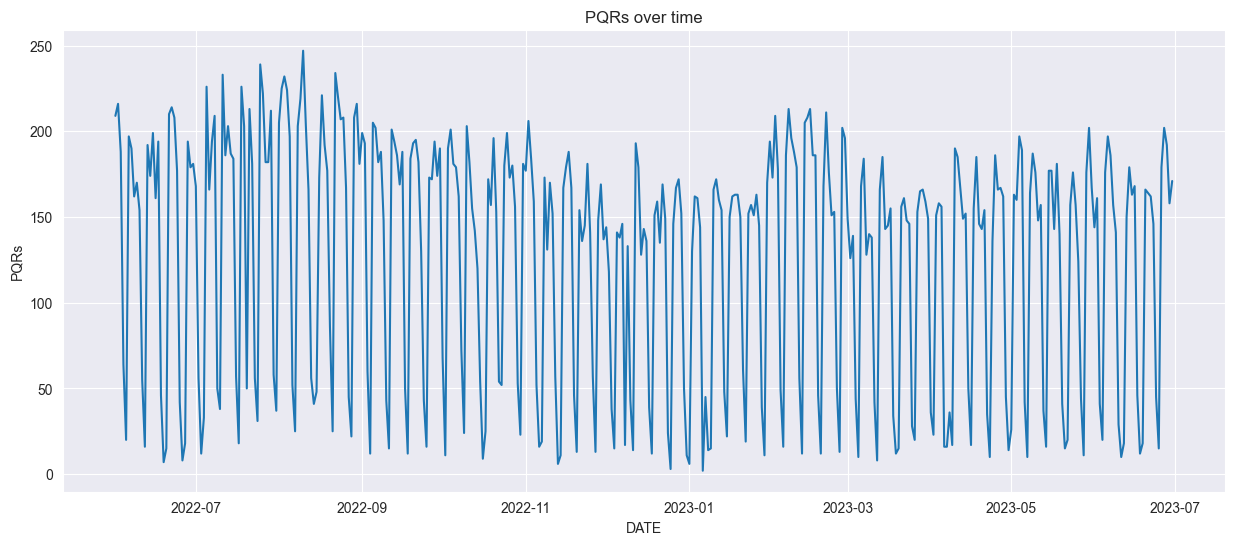

In [113]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=PQRS_over_time_df, x='DATE', y='PQRs')
plt.title('PQRs over time')

In [114]:
PQRS_over_time_df.to_csv('results/PQRS_over_time.csv', index=False)

As can be seen in the graph above, the number of PQRs has been cyclical, with peaks and valleys, but with no clear trend, indicating that the number of PQRs is not increasing or decreasing over time, just a slight peak in around 2022-08.

## 4.2 How are PQRs distributed in different typologies and what conclusions can be drawn from this?

In [115]:
PQRs_typology_df = pqr_df.groupby("Tipologia").size().reset_index(name="PQRs")
PQRs_typology_df.head()

,Tipologia,PQRs
0,Reclamo,6813
1,Servicio,43187


Text(0.5, 1.0, 'Typologies distribution')

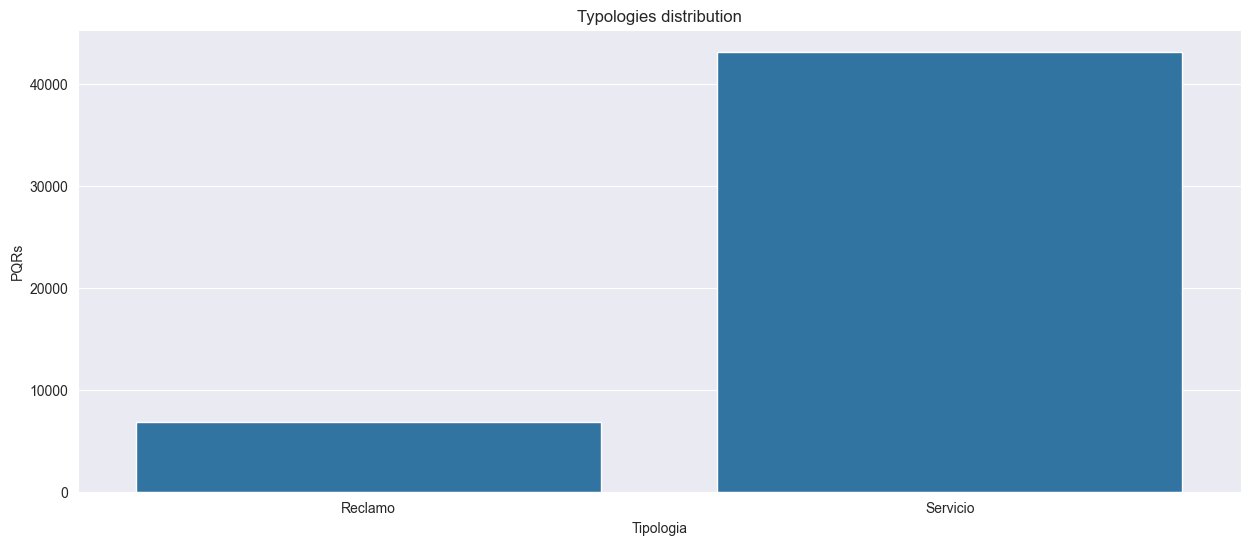

In [116]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRs_typology_df, x="Tipologia", y="PQRs")
plt.title('Typologies distribution')

([<matplotlib.patches.Wedge at 0x312fac950>,
 [Text(1.0007439151448263, 0.4566307220288677, 'Reclamo'),
  Text(-1.0007438723919682, -0.4566308157252731, 'Servicio')],
 [Text(0.5458603173517234, 0.2490713029248369, '13.6%'),
  Text(-0.5458602940319826, -0.24907135403196712, '86.4%')])

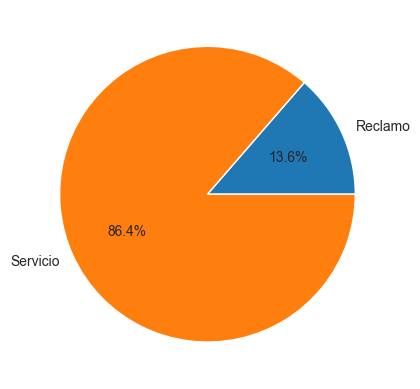

In [119]:
plt.pie(PQRs_typology_df['PQRs'], labels=PQRs_typology_df['Tipologia'], autopct='%1.1f%%')

In [117]:
PQRs_typology_df.to_csv('results/PQRs_typology.csv', index=False)